In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [22]:
data=pd.read_csv('/Users/omgajipara/Desktop/Data Science/Supervised Learning/Regression/Simple_Linear_Regression/SimpleLinearRegression.csv')
data

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [23]:
print(data.isnull().sum())

cgpa       0
package    0
dtype: int64


Boxplot to Check Outliers

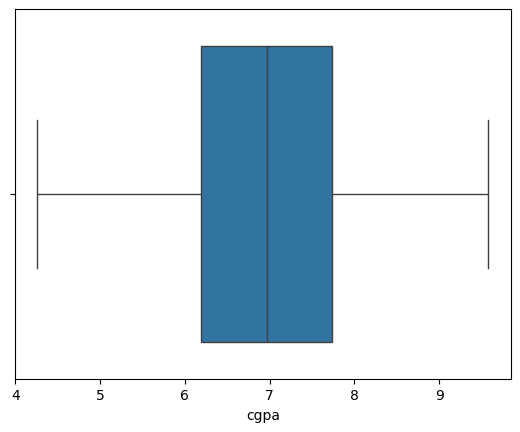

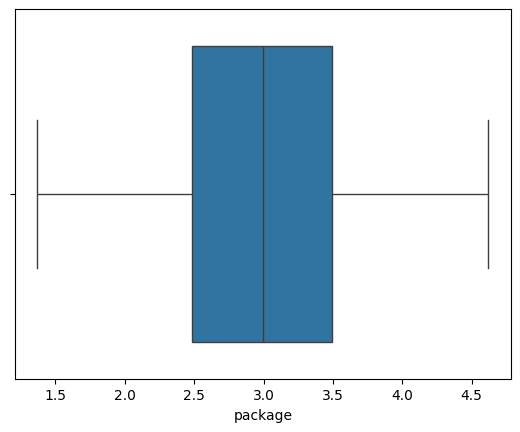

In [24]:
for i in data:
    sns.boxplot(x=i,data=data)
    plt.show()

    

In [25]:
data.info

<bound method DataFrame.info of      cgpa  package
0    6.89     3.26
1    5.12     1.98
2    7.82     3.25
3    7.42     3.67
4    6.94     3.57
..    ...      ...
195  6.93     2.46
196  5.89     2.57
197  7.21     3.24
198  7.63     3.96
199  6.22     2.33

[200 rows x 2 columns]>

In [26]:
data.describe

<bound method NDFrame.describe of      cgpa  package
0    6.89     3.26
1    5.12     1.98
2    7.82     3.25
3    7.42     3.67
4    6.94     3.57
..    ...      ...
195  6.93     2.46
196  5.89     2.57
197  7.21     3.24
198  7.63     3.96
199  6.22     2.33

[200 rows x 2 columns]>

Exploratory Data Analysis

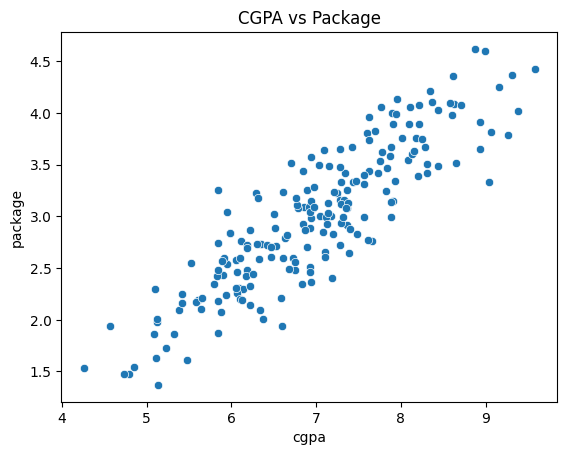

In [27]:
sns.scatterplot(x='cgpa', y='package', data=data)
plt.title("CGPA vs Package")
plt.show()


Data Preprocessing

In [28]:
x=data[['cgpa']]
y=data['package']

scaler = StandardScaler()


# Scale X only (don't scale y usually)
X_scaled = scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=85)

Train Model

In [29]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
lr.score(x_test,y_test)*100

85.80351344115054

Make Prediction

In [31]:

scaled_value = scaler.transform([[7.82]])
lr.predict(scaled_value)


/Users/omgajipara/Desktop/Data Science/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([3.46399312])

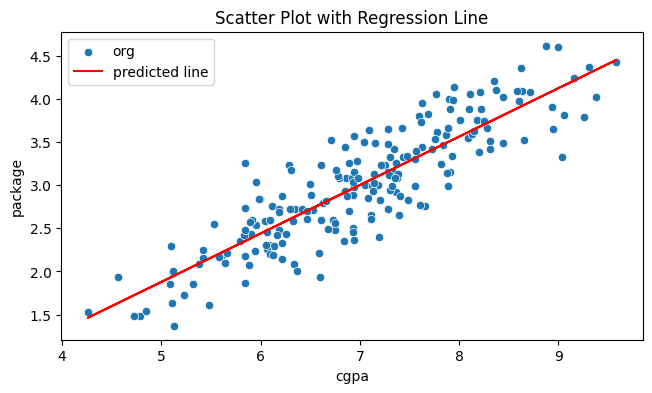

In [32]:
plt.figure(figsize=(7.5,4))
yprd=lr.predict(X_scaled)
sns.scatterplot(x='cgpa',y='package',data=data)
plt.plot(data['cgpa'],yprd,c='red')
plt.title("Simple Linear Regression")
plt.xlabel('cgpa')
plt.ylabel('package')
plt.legend(['org','predicted line'])
plt.savefig('assets/SimpleLinearRegression.jpg')
plt.title("Scatter Plot with Regression Line")

plt.show()


In [33]:
c=lr.intercept_
m=lr.coef_
y=(m*6.89 ) + c
y

array([7.13144257])

Evaluation Metrics

In [34]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = lr.predict(x_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 0.22934764405273142
R² Score: 0.8580351344115055


Visualizations

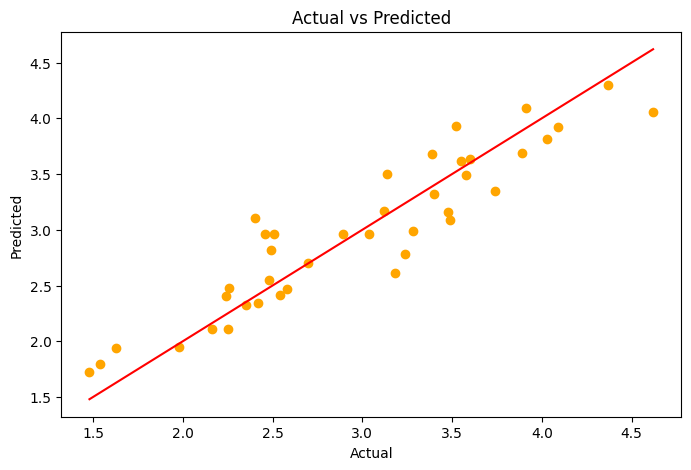

In [35]:

# 📈 3. Predicted vs Actual
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color="orange")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # perfect prediction line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


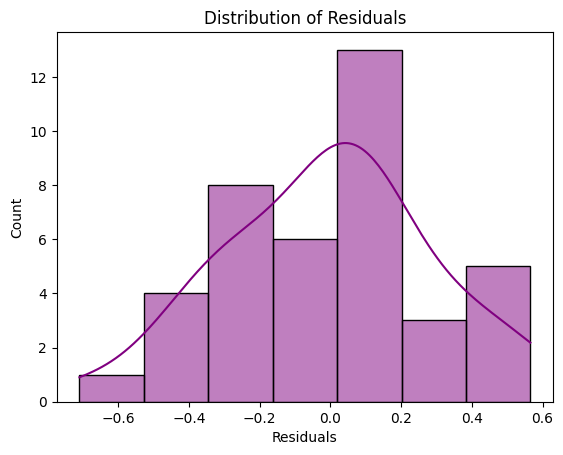

In [36]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='purple')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()


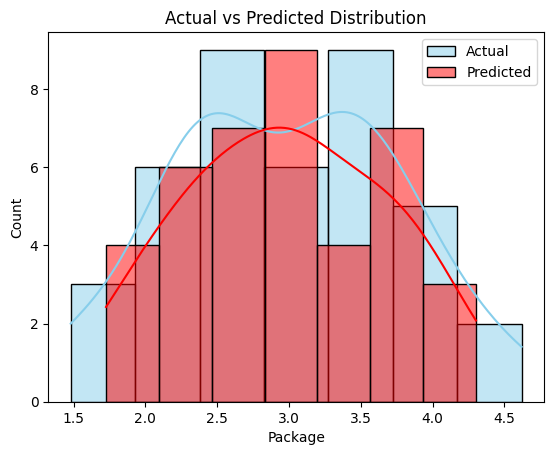

In [37]:
sns.histplot(y_test, label="Actual", color="skyblue", kde=True)
sns.histplot(y_pred, label="Predicted", color="red", kde=True)
plt.legend()
plt.title("Actual vs Predicted Distribution")
plt.xlabel("Package")
plt.show()


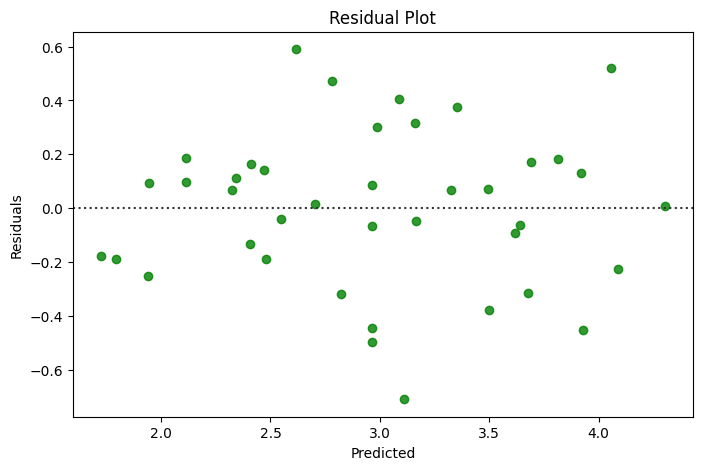

In [38]:
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.residplot(x=y_pred, y=residuals, color="g")  # Remove lowess=True
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


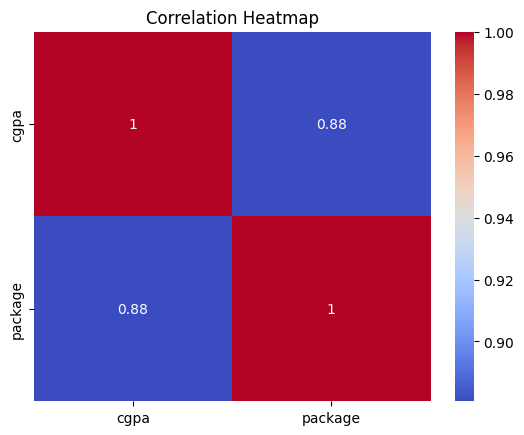

In [39]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [40]:
# Save
import pickle
with open("/Users/omgajipara/Desktop/Data Science/TrainedModels/SimpleLinearRegression/SimpleLinearRegression_model.pkl", "wb") as f:
    pickle.dump(lr, f)

with open("/Users/omgajipara/Desktop/Data Science/TrainedModels/SimpleLinearRegression/SimpleLinearRegression_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


